# About Aerofit #

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.


# Business Problem #

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

# Dataset #

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

- Product Purchased:	KP281, KP481, or KP781
- Age:	In years
- Gender:	Male/Female
- Education:	In years
- MaritalStatus:	Single or partnered
- Usage:	The average number of times the customer plans to use the treadmill each week.
- Income:	Annual income (in $)
- Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
- Miles:	The average number of miles the customer expects to walk/run each week

**Product Portfolio:**

1. The KP281 is an entry-level treadmill that sells for \$1,500
2. The KP481 is for mid-level runners that sell for \$1,750 
3. The KP781 treadmill is having advanced features that sell for \$2,500 

# Solution

## Read data and analyze basic metrics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data/aerofit_treadmill.csv')
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [2]:
print(data.info()) #No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB
None


**Observations**
1. Dataset contains 180 rows and 9 columns. There are no null values in the dataset.
2. {Age, Gender, Education, MaritalStatus, Usage, Fitness, Income, Miles} represent various customer attributes and are independent variables (X's). {Product} is the target variable (Y)

In [3]:
data.describe() #Basic statistical properties of numeric features

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


## Univariate Analysis

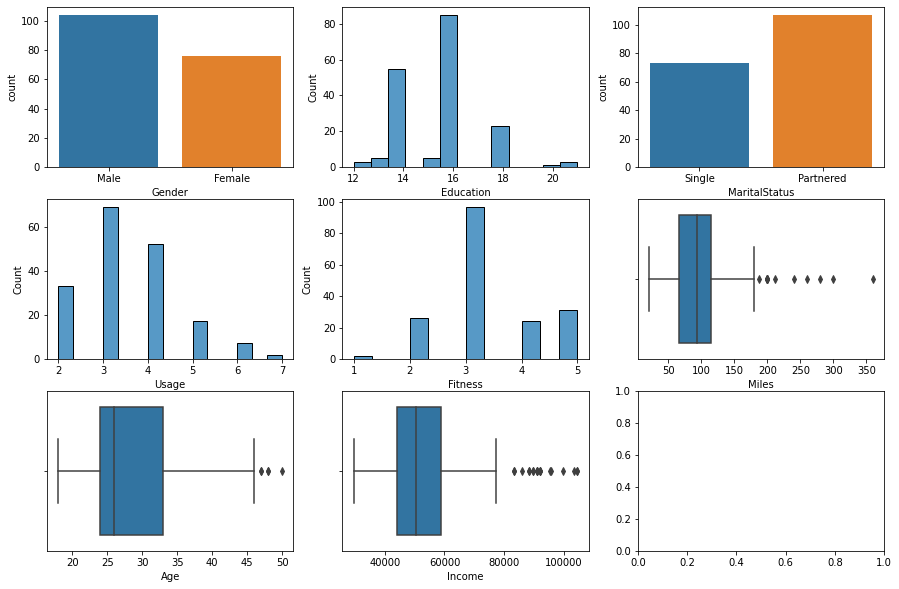

In [4]:
#univariate analysis

fig, ax = plt.subplots(3, 3, figsize=(15, 10))

sns.countplot(x=data['Gender'], ax=ax[0][0])
sns.histplot(x=data['Education'], ax=ax[0][1])
sns.countplot(x=data['MaritalStatus'], ax=ax[0][2])

sns.histplot(x=data['Usage'], ax=ax[1][0])
sns.histplot(x=data['Fitness'], ax=ax[1][1])
sns.boxplot(x=data['Miles'], ax=ax[1][2])

sns.boxplot(x=data['Age'], ax=ax[2][0])
sns.boxplot(x=data['Income'], ax=ax[2][1])

plt.show()

**Observations**
1. Gender: Male=104, Female=76
2. Education: Range is from 12 to 21 years with 16 years, 14 years ,and 18 years being the three most common education levels in that order.
3. MaritalStatus: Single=73, Partnered=107
4. Usage: Range is 2-7 days a week with 3 and 4 being the most common values
5. Fitness: Range is 1-5 with3 being the most common value.
6. Miles: 8 outliers. (refer to the describe output for more statistical parameters)
7. Age: 3 outliers. (refer to the describe output for more statistical parameters)
8. Income: 10 outliers. (refer to the describe output for more statistical parameters)

## Understanding relation between Gender and other indepedent variables

We now attempt to understand how features such as Age, Education, Income, Marital status, Miles, Fitness, Miles and Usagerelate with customer's gender. The aim here is understand if a customer's gender impacts any of these indepedent variables. 

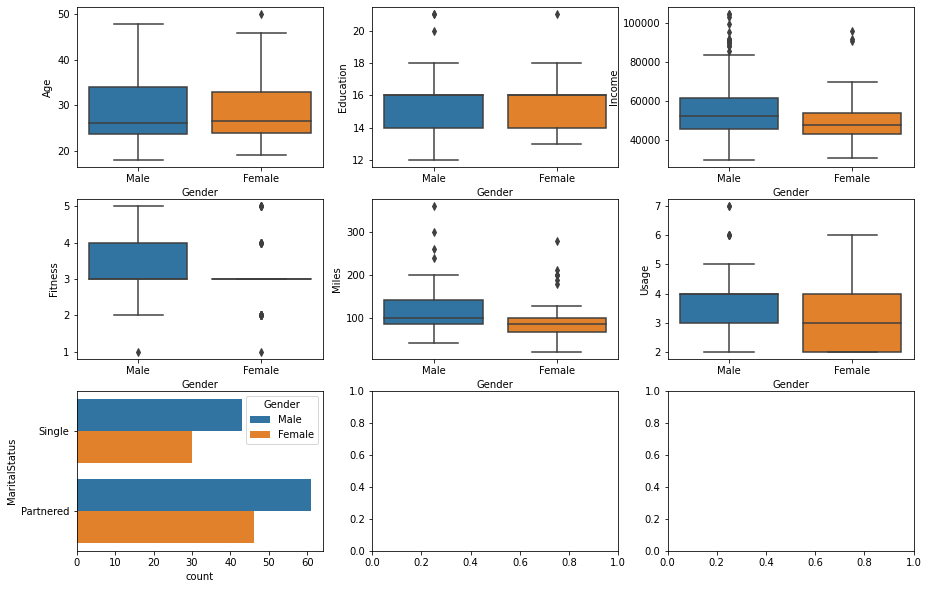

             Age  Education      Usage    Fitness        Income       Miles
count  76.000000  76.000000  76.000000  76.000000     76.000000   76.000000
mean   28.565789  15.394737   3.184211   3.026316  49828.907895   90.013158
std     6.342104   1.442950   1.016012   0.832245  12557.690428   44.782882
min    19.000000  13.000000   2.000000   1.000000  30699.000000   21.000000
25%    24.000000  14.000000   2.000000   3.000000  42921.750000   66.000000
50%    26.500000  16.000000   3.000000   3.000000  47754.000000   85.000000
75%    33.000000  16.000000   4.000000   3.000000  53796.000000  100.000000
max    50.000000  21.000000   6.000000   5.000000  95866.000000  280.000000
              Age   Education       Usage     Fitness         Income  \
count  104.000000  104.000000  104.000000  104.000000     104.000000   
mean    28.951923   15.701923    3.653846    3.519231   56562.759615   
std      7.377978    1.728571    1.095172    0.994946   18421.687779   
min     18.000000   12.00000

In [5]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))

#sns.countplot(x=data['Gender'], hue=data['Product'], ax=ax[0][0])

sns.boxplot(x=data['Gender'], y=data['Age'], ax=ax[0][0])
sns.boxplot(x=data['Gender'], y=data['Education'], ax=ax[0][1])
sns.boxplot(x=data['Gender'], y=data['Income'], ax=ax[0][2])
sns.boxplot(x=data['Gender'], y=data['Fitness'], ax=ax[1][0])
sns.boxplot(x=data['Gender'], y=data['Miles'], ax=ax[1][1])
sns.boxplot(x=data['Gender'], y=data['Usage'], ax=ax[1][2])
sns.countplot(y=data['MaritalStatus'], hue=data['Gender'], ax=ax[2][0])

plt.show()

print(data[data['Gender'] == 'Female'].describe())
print(data[data['Gender'] == 'Male'].describe())

**Observations**
1. Education and Age distribution look similar between males and females.
2. Males' median income is greater than that of females. Males' IQR is around 45k-60K. Females' IQR is lesser at around 35k-55k. Number of male outliers earning more > number of female outliers earning more. **In general, males earn more than females.**
3. Similarly, for Fitness, Miles and Usage, males have higher average values than females.
4. For both male and female, ratio of Single to Partnered seem similar.

## Understanding impact of various indepedent variables on Product purchased

### Income and Product

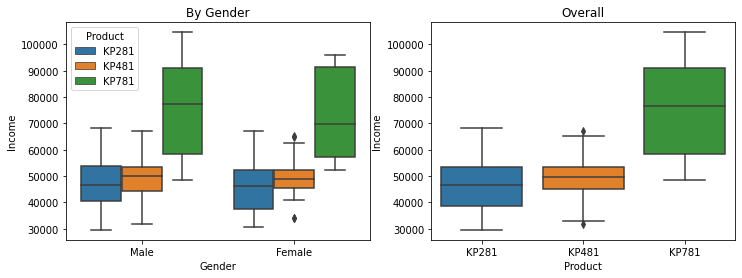

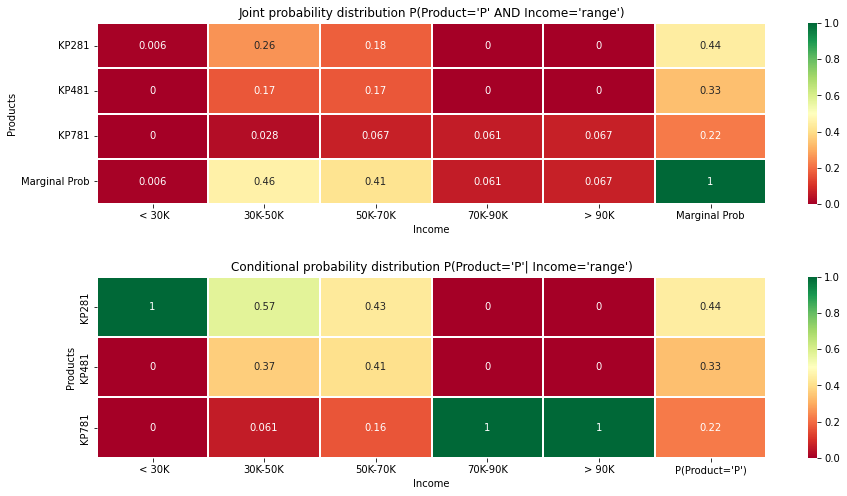

In [6]:
##### plots
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].title.set_text('By Gender')
sns.boxplot(x=data['Gender'], y=data['Income'], hue=data['Product'], ax=ax[0])

ax[1].title.set_text('Overall')
sns.boxplot(y=data['Income'], x=data['Product'], ax=ax[1])

plt.show()

##### joint, conditional, and marginal probabilities

#helper function for binning continuous variables
def getrange(range_arr, val):
    for lim, label in range_arr:
        if(val < lim):
            return label
    return 'other'

income_ranges = [[30000, ' < 30K'], [50000, '30K-50K'], [70000, '50K-70K'], [90000, '70K-90K'], [110000, '> 90K']]
data['income_range'] = data['Income'].apply(lambda x: getrange(income_ranges, x))

df = data
df_joint = pd.crosstab(
    df['Product'], 
    df['income_range'], 
    rownames=['Products'], 
    colnames=['Income'], 
    margins=True,
    margins_name='Marginal Prob',
    normalize='all'
).transform(lambda x: np.round(x, 3))

df_conditional = pd.crosstab(
    df['Product'], 
    df['income_range'], 
    rownames=['Products'], 
    colnames=['Income'], 
    margins=True,
    margins_name="P(Product='P')",
    normalize='columns'
).transform(lambda x: np.round(x, 3))

fig, ax = plt.subplots(2, 1, figsize=(15, 8))
ax[0].title.set_text("Joint probability distribution P(Product='P' AND Income='range')")
sns.heatmap(df_joint, cmap ='RdYlGn', linewidths = 0.3, annot = True, ax=ax[0])
ax[1].title.set_text("Conditional probability distribution P(Product='P'| Income='range')")
sns.heatmap(df_conditional, cmap ='RdYlGn', linewidths = 0.3, annot = True, ax=ax[1])

plt.subplots_adjust(hspace=0.4)
plt.show()

**Observations**
1. Income is a strong indicator of the product purchased. 
2. Individuals with income >= 70K are very highly likely to purchase 'KP781'
3. Individuals with income < 30K are very highly likely to purchase 'KP281'
4. Individuals in 30K-50K range are more likely to purchase 'KP281' than 'KP481'. Very less likely to purchase 'KP781'.
5. Individuals in 50K-70K range more likely to purchase either of the first two products. Less likely to purchase 'KP781'

**recommendations**
1. Higher income customers (>70K) are very good potential buyers for the costlest product variant (KP781). 
2. Lower income customers (<30K) are more likely to purchase the basic variant (KP281).
3. Mid income customers (30K-50K) are likely to purchase KP281 or KP481. There is a good upselling opportunity to sell 'KP481' to them.
4. For consumers in Mid-High income range (50K-70K), there is a good upselling opportunity to convert them to 'KP781' category. 


### Education and Product

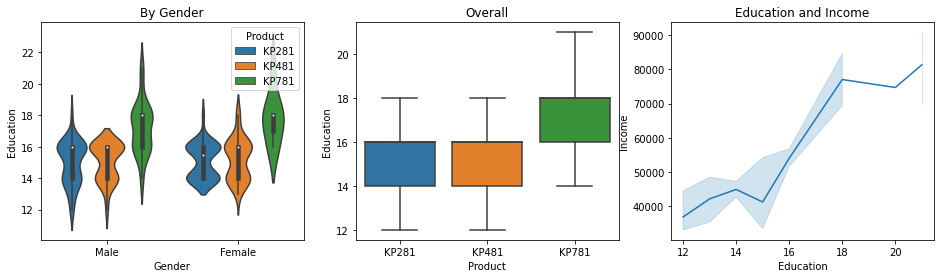

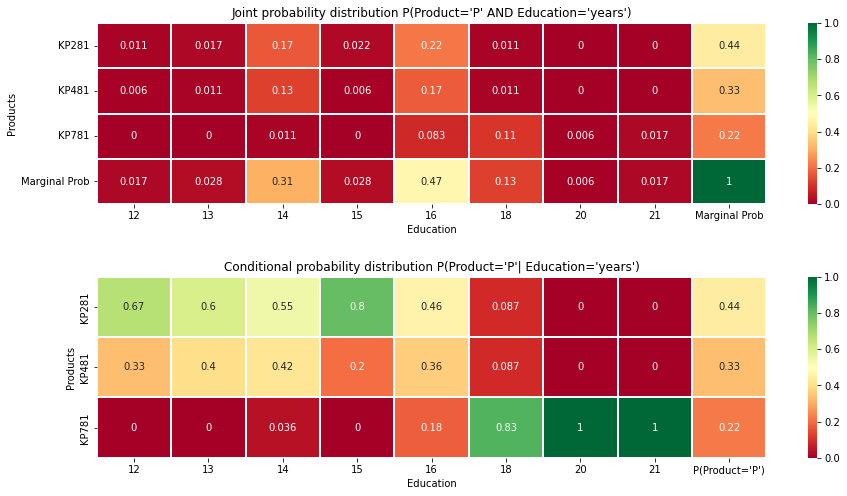

In [7]:
##### plots
fig, ax = plt.subplots(1, 3, figsize=(16, 4))

ax[0].title.set_text('By Gender')
sns.violinplot(x=data['Gender'], y=data['Education'], hue=data['Product'], ax=ax[0])

ax[1].title.set_text('Overall')
sns.boxplot(y=data['Education'], x=data['Product'], ax=ax[1])

ax[2].title.set_text('Education and Income')
sns.lineplot(x=data['Education'], y=data['Income'], ax=ax[2])

plt.show()

df_joint = pd.crosstab(
    df['Product'], 
    df['Education'], 
    rownames=['Products'], 
    colnames=['Education'], 
    margins=True,
    margins_name='Marginal Prob',
    normalize='all'
).transform(lambda x: np.round(x, 3))

df_conditional = pd.crosstab(
    df['Product'], 
    df['Education'], 
    rownames=['Products'], 
    colnames=['Education'], 
    margins=True,
    margins_name="P(Product='P')",
    normalize='columns'
).transform(lambda x: np.round(x, 3))

fig, ax = plt.subplots(2, 1, figsize=(15, 8))
ax[0].title.set_text("Joint probability distribution P(Product='P' AND Education='years')")
sns.heatmap(df_joint, cmap ='RdYlGn', linewidths = 0.3, annot = True, ax=ax[0])
ax[1].title.set_text("Conditional probability distribution P(Product='P'| Education='years')")
sns.heatmap(df_conditional, cmap ='RdYlGn', linewidths = 0.3, annot = True, ax=ax[1])

plt.subplots_adjust(hspace=0.4)
plt.show()

**Observations**
1. Highly educated consumers (>= 18 years) are highly likely to purchase 'KP781'.
2. Customers with education level 12-15 years are **more likely** to purchase 'KP281' than 'KP481'. Very Less likely to purchase 'KP781'.
3. Customers in 16-18 years are likely to purchase **either** 'KP281' or 'KP481'. Less likely to purchase 'KP781'.

Note: We observer that in general, income rises with education. So in the previous section where we analyzed income vs product, there could be a possiblity that education may be the confounding variable impacting both income and product purchased.

**recommendations**
1. Highly educated customers (>=18 years) are very good potential buyers for the costlest product variant (KP781).
2. consumers with lower education level (12-16 years) are more likely to purchase the basic variant (KP281).
3. There is an opportunity to persuade consumers with education level (16-18 years) to purchase 'KP481'

### Gender and Product

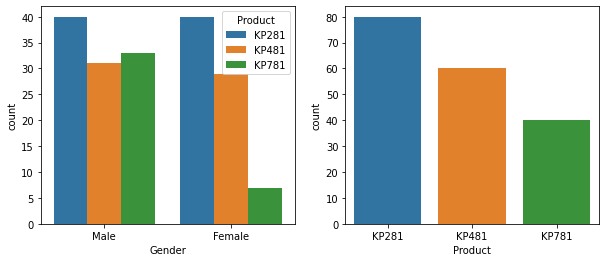

No of high earning/highly educated females: 
9


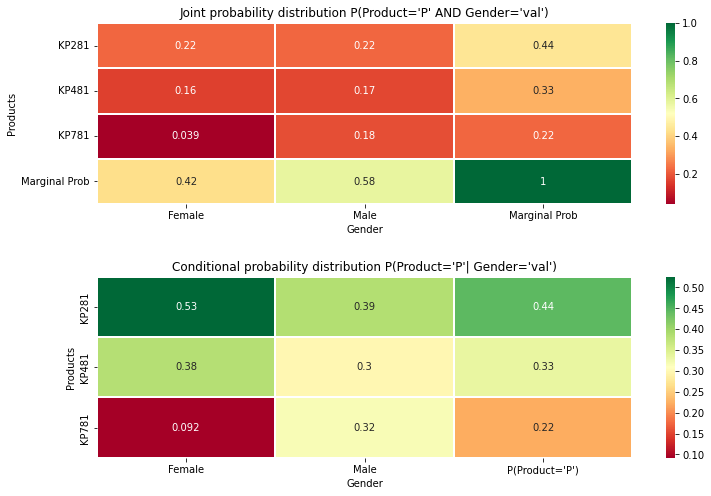

In [8]:
##### plots
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.countplot(x=data['Gender'], hue=data['Product'], ax=ax[0])
sns.countplot(x=data['Product'], ax=ax[1])

plt.show()

df_female = data[data['Gender'] == 'Female']
print('No of high earning/highly educated females: ')
print(df_female[(df_female['Income'] >= 70000) | (df_female['Education'] >= 18)].shape[0])

#### probabilities

df = data
df_joint = pd.crosstab(
    df['Product'], 
    df['Gender'], 
    rownames=['Products'], 
    colnames=['Gender'], 
    margins=True,
    margins_name='Marginal Prob',
    normalize='all'
).transform(lambda x: np.round(x, 3))

df_conditional = pd.crosstab(
    df['Product'], 
    df['Gender'], 
    rownames=['Products'], 
    colnames=['Gender'], 
    margins=True,
    margins_name="P(Product='P')",
    normalize='columns'
).transform(lambda x: np.round(x, 3))

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].title.set_text("Joint probability distribution P(Product='P' AND Gender='val')")
sns.heatmap(df_joint, cmap ='RdYlGn', linewidths = 0.3, annot = True, ax=ax[0])
ax[1].title.set_text("Conditional probability distribution P(Product='P'| Gender='val')")
sns.heatmap(df_conditional, cmap ='RdYlGn', linewidths = 0.3, annot = True, ax=ax[1])

plt.subplots_adjust(hspace=0.4)
plt.show()

**Observations**
1. Gender doesn't seem to be a strong factor that influences Product purchase behaviour. 
2. While we do see overall less number of 'KP781' sold to females compared to males, it's because there lesser number of highly educated/high earning females compared to males.

**recommendations**
Consumer gender does not impact purchase behavior.

### Age and Product

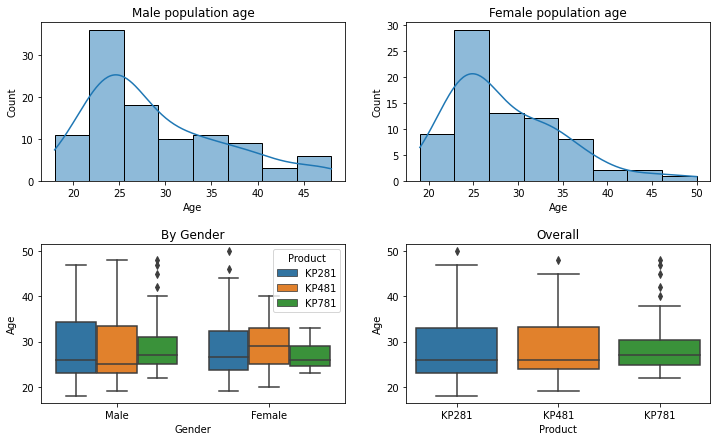

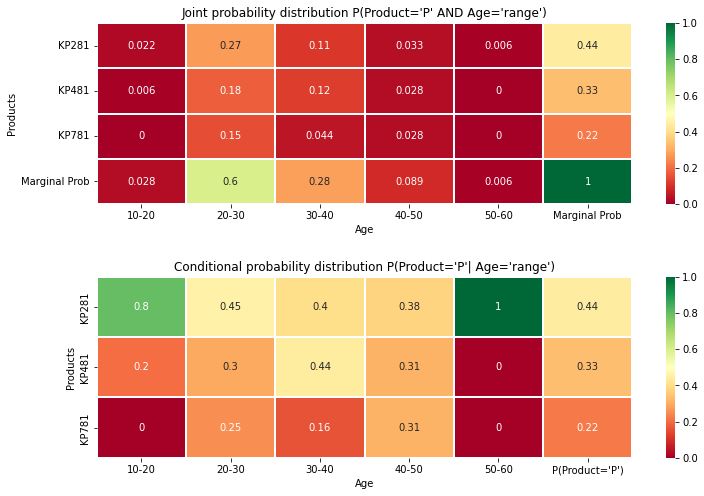

In [9]:
##### plots
fig, ax = plt.subplots(2, 2, figsize=(12, 7))

ax[0][0].title.set_text('Male population age')
sns.histplot(x=data[data['Gender'] == 'Male']['Age'], kde=True, ax=ax[0][0])

ax[0][1].title.set_text('Female population age')
sns.histplot(x=data[data['Gender'] == 'Female']['Age'], kde=True, ax=ax[0][1])

ax[1][0].title.set_text('By Gender')
sns.boxplot(x=data['Gender'], y=data['Age'], hue=data['Product'], ax=ax[1][0])

ax[1][1].title.set_text('Overall')
sns.boxplot(y=data['Age'], x=data['Product'], ax=ax[1][1])

plt.subplots_adjust(hspace=0.4)

plt.show()

#### probabilities

age_ranges = [[10, ' < 10'], [20, '10-20'], [30, '20-30'], [40, '30-40'], [50, '40-50'], [60, '50-60'], [100, '>60']]
data['age_range'] = data['Age'].apply(lambda x: getrange(age_ranges, x))

df = data
df_joint = pd.crosstab(
    df['Product'], 
    df['age_range'], 
    rownames=['Products'], 
    colnames=['Age'], 
    margins=True,
    margins_name='Marginal Prob',
    normalize='all'
).transform(lambda x: np.round(x, 3))

df_conditional = pd.crosstab(
    df['Product'], 
    df['age_range'], 
    rownames=['Products'], 
    colnames=['Age'], 
    margins=True,
    margins_name="P(Product='P')",
    normalize='columns'
).transform(lambda x: np.round(x, 3))

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].title.set_text("Joint probability distribution P(Product='P' AND Age='range')")
sns.heatmap(df_joint, cmap ='RdYlGn', linewidths = 0.3, annot = True, ax=ax[0])
ax[1].title.set_text("Conditional probability distribution P(Product='P'| Age='range')")
sns.heatmap(df_conditional, cmap ='RdYlGn', linewidths = 0.3, annot = True, ax=ax[1])

plt.subplots_adjust(hspace=0.4)
plt.show()


**Observations**
Age doesn't seem to be a strong indicator factor of consumer's purchase decision.

**recommendation**
None

### Miles and Product

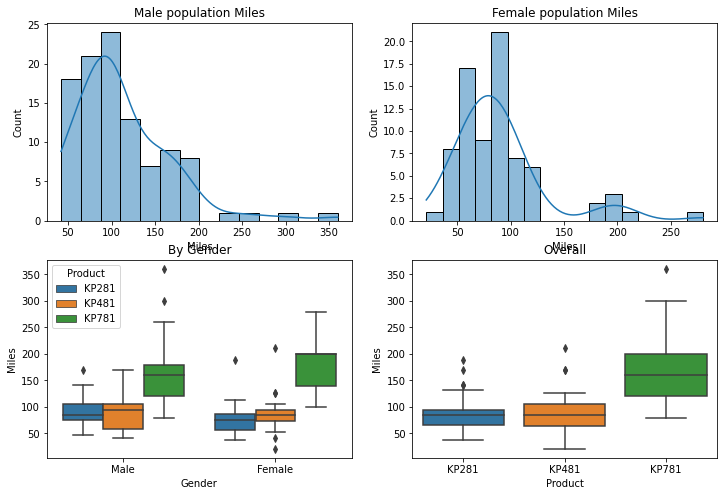

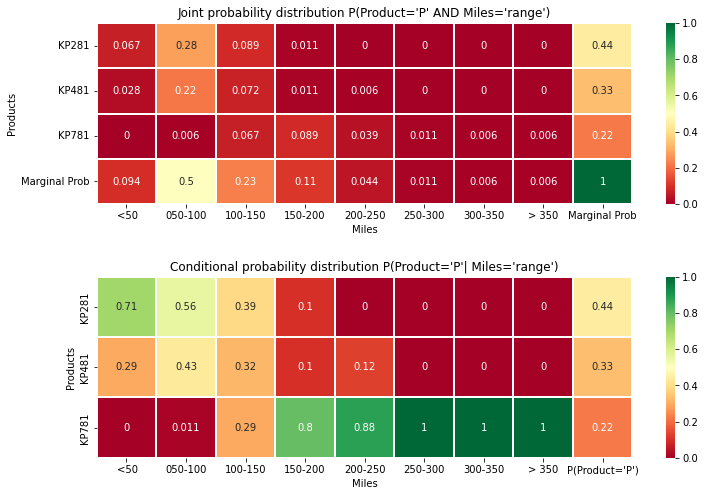

In [14]:
##### plots
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0][0].title.set_text('Male population Miles')
sns.histplot(x=data[data['Gender'] == 'Male']['Miles'], kde=True, ax=ax[0][0])

ax[0][1].title.set_text('Female population Miles')
sns.histplot(x=data[data['Gender'] == 'Female']['Miles'], kde=True, ax=ax[0][1])

ax[1][0].title.set_text('By Gender')
sns.boxplot(x=data['Gender'], y=data['Miles'], hue=data['Product'], ax=ax[1][0])

ax[1][1].title.set_text('Overall')
sns.boxplot(y=data['Miles'], x=data['Product'], ax=ax[1][1])

plt.show()

##### joint, conditional, and marginal probabilities

miles_ranges = [[50, ' <50'], [100, '050-100'], [150, '100-150'], [200, '150-200'], [250, '200-250'], [300, '250-300'], [350, '300-350'], [400, '> 350']]
#miles_ranges = [[50, ' <50'], [60, '050-60'] , [70, '060-70'], [80, '060-80'], [90, '080-90'], [100, '090-100'], [150, '100-150'], [200, '150-200'], [250, '200-250'], [300, '250-300'], [350, '300-350'], [400, '> 350']]
data['miles_range'] = data['Miles'].apply(lambda x: getrange(miles_ranges, x))

df = data
df_joint = pd.crosstab(
    df['Product'], 
    df['miles_range'], 
    rownames=['Products'], 
    colnames=['Miles'], 
    margins=True,
    margins_name='Marginal Prob',
    normalize='all'
).transform(lambda x: np.round(x, 3))

df_conditional = pd.crosstab(
    df['Product'], 
    df['miles_range'], 
    rownames=['Products'], 
    colnames=['Miles'], 
    margins=True,
    margins_name="P(Product='P')",
    normalize='columns'
).transform(lambda x: np.round(x, 3))

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].title.set_text("Joint probability distribution P(Product='P' AND Miles='range')")
sns.heatmap(df_joint, cmap ='RdYlGn', linewidths = 0.3, annot = True, ax=ax[0])
ax[1].title.set_text("Conditional probability distribution P(Product='P'| Miles='range')")
sns.heatmap(df_conditional, cmap ='RdYlGn', linewidths = 0.3, annot = True, ax=ax[1])

plt.subplots_adjust(hspace=0.4)
plt.show()

**Observations**
1. Consumers with higher Miles (> 150) are very likely to purchase 'KP781'.
2. Consumers with Miles < 50 are likely to purchase 'KP281' over 'KP481'. Very less likely to purchase 'KP781'
3. Consumers with Miles between 100 to 150 are likely to purchase any of the three models.

**recommendations**
1. Consumers with Miles > 150 are great potential customers for 'KP781'
2. Consumers with Miles < 50 are likely to purchase 'KP281' over 'KP481'. Potential upselling opportunity to sell 'KP481'
3. Consumer with Miles 100-150 should be persuaded to purchase higher value products.

### Usage and Product

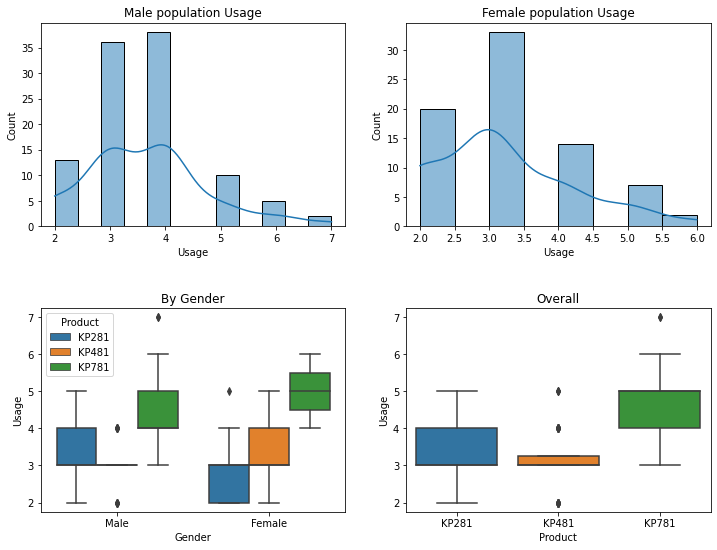

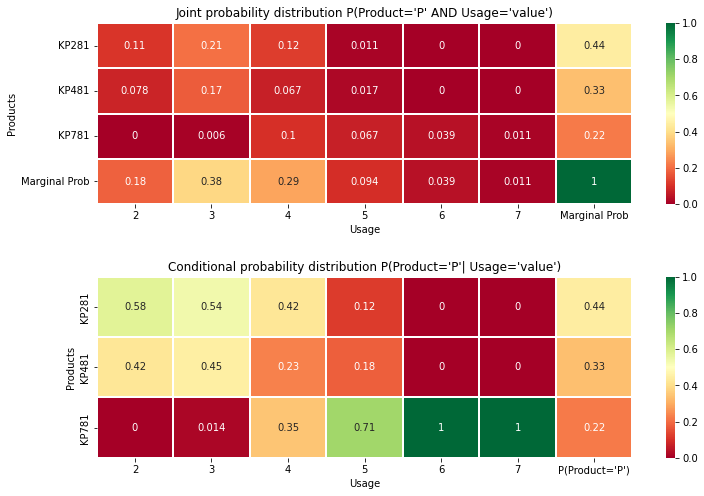

In [15]:
##### plots
fig, ax = plt.subplots(2, 2, figsize=(12, 9))

ax[0][0].title.set_text('Male population Usage')
sns.histplot(x=data[data['Gender'] == 'Male']['Usage'], kde=True, ax=ax[0][0])

ax[0][1].title.set_text('Female population Usage')
sns.histplot(x=data[data['Gender'] == 'Female']['Usage'], kde=True, ax=ax[0][1])

ax[1][0].title.set_text('By Gender')
sns.boxplot(x=data['Gender'], y=data['Usage'], hue=data['Product'], ax=ax[1][0])

ax[1][1].title.set_text('Overall')
sns.boxplot(y=data['Usage'], x=data['Product'], ax=ax[1][1])

plt.subplots_adjust(hspace=0.4)

plt.show()

##### joint, conditional, and marginal probabilities

df = data
df_joint = pd.crosstab(
    df['Product'], 
    df['Usage'], 
    rownames=['Products'], 
    colnames=['Usage'], 
    margins=True,
    margins_name='Marginal Prob',
    normalize='all'
).transform(lambda x: np.round(x, 3))

df_conditional = pd.crosstab(
    df['Product'], 
    df['Usage'], 
    rownames=['Products'], 
    colnames=['Usage'], 
    margins=True,
    margins_name="P(Product='P')",
    normalize='columns'
).transform(lambda x: np.round(x, 3))

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].title.set_text("Joint probability distribution P(Product='P' AND Usage='value')")
sns.heatmap(df_joint, cmap ='RdYlGn', linewidths = 0.3, annot = True, ax=ax[0])
ax[1].title.set_text("Conditional probability distribution P(Product='P'| Usage='value')")
sns.heatmap(df_conditional, cmap ='RdYlGn', linewidths = 0.3, annot = True, ax=ax[1])

plt.subplots_adjust(hspace=0.4)
plt.show()

**Observations**
1. Consumers with Usage or 5 or more are very likely to purchase product 'KP781'
2. consumers with low usage (2 or 3) are likely to purchase either 'KP281' or 'KP481'
3. consumers with usage rating of 4 more likely to purchase 'KP281' or 'KP781' over 'KP481'

**recommendations**
1. Consumers with usage of 5 or more are great customers for 'KP781'
2. Consumers with usage of 2 or 3 are likely to purchase 'KP281' or 'KP481'. Upselling opportunity to sell 'KP481' to all consumers in this range.
3. Consumers with usage of 4 can be persuaded to purchase 'KP781'

### Fitness and Product

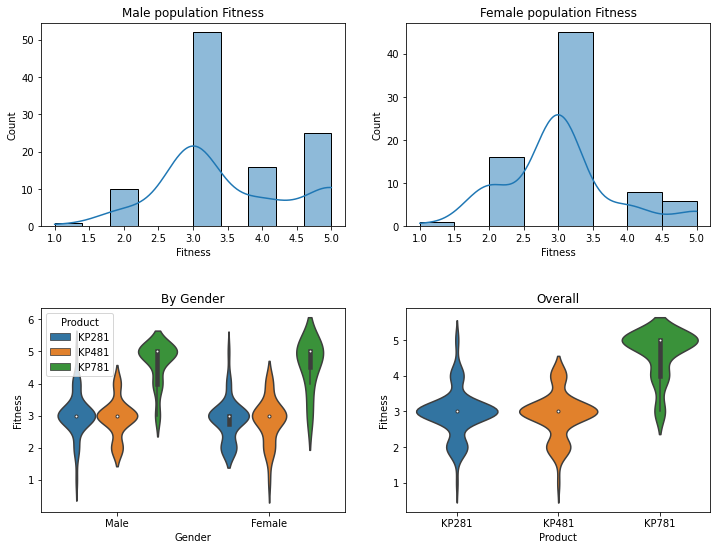

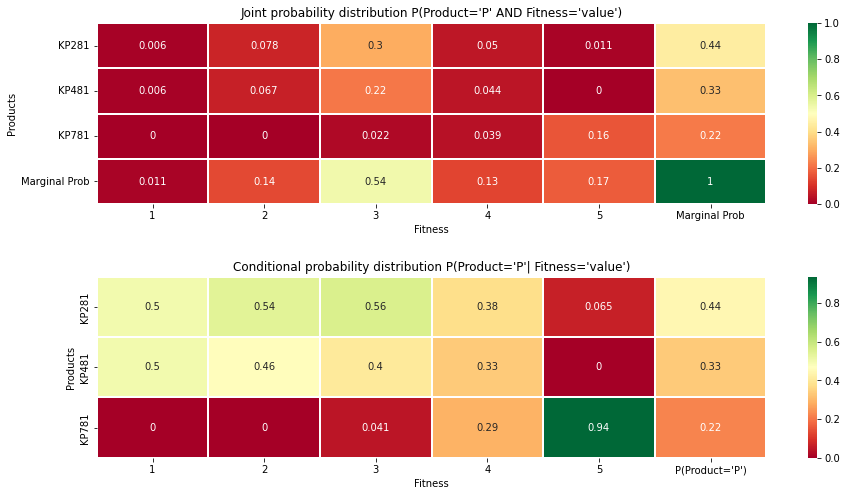

In [12]:
##### plots
fig, ax = plt.subplots(2, 2, figsize=(12, 9))

ax[0][0].title.set_text('Male population Fitness')
sns.histplot(x=data[data['Gender'] == 'Male']['Fitness'], kde=True, ax=ax[0][0])

ax[0][1].title.set_text('Female population Fitness')
sns.histplot(x=data[data['Gender'] == 'Female']['Fitness'], kde=True, ax=ax[0][1])

ax[1][0].title.set_text('By Gender')
sns.violinplot(x=data['Gender'], y=data['Fitness'], hue=data['Product'], ax=ax[1][0])

ax[1][1].title.set_text('Overall')
sns.violinplot(y=data['Fitness'], x=data['Product'], ax=ax[1][1])

plt.subplots_adjust(hspace=0.4)

plt.show()

##### joint, conditional, and marginal probabilities

df = data
df_joint = pd.crosstab(
    df['Product'], 
    df['Fitness'], 
    rownames=['Products'], 
    colnames=['Fitness'], 
    margins=True,
    margins_name='Marginal Prob',
    normalize='all'
).transform(lambda x: np.round(x, 3))

df_conditional = pd.crosstab(
    df['Product'], 
    df['Fitness'], 
    rownames=['Products'], 
    colnames=['Fitness'], 
    margins=True,
    margins_name="P(Product='P')",
    normalize='columns'
).transform(lambda x: np.round(x, 3))

fig, ax = plt.subplots(2, 1, figsize=(15, 8))
ax[0].title.set_text("Joint probability distribution P(Product='P' AND Fitness='value')")
sns.heatmap(df_joint, cmap ='RdYlGn', linewidths = 0.3, annot = True, ax=ax[0])
ax[1].title.set_text("Conditional probability distribution P(Product='P'| Fitness='value')")
sns.heatmap(df_conditional, cmap ='RdYlGn', linewidths = 0.3, annot = True, ax=ax[1])

plt.subplots_adjust(hspace=0.4)
plt.show()

**Observations**
1. Consumers with Fitness level of 5 are very likely to purchase product 'KP781'
2. consumers with low-average Fitness level (1-3) are equally likely to purchase 'KP281' or 'KP481'. Very less likely to purchase 'KP781'
3. consumers with Fitness level of 4 are open to purchasing either of three models.

**recommendations**
1. Consumers with Fitness level of 5 are great customers for 'KP781'
2. Consumers with Fitness level of 1-3 are equally likely to purchase 'KP281' or 'KP481'. Upselling opportunity to sell 'KP481' to all consumers in this range.
3. Consumers with Fitness of 4 can be persuaded to purchase 'KP781'

### Marital Status and Product

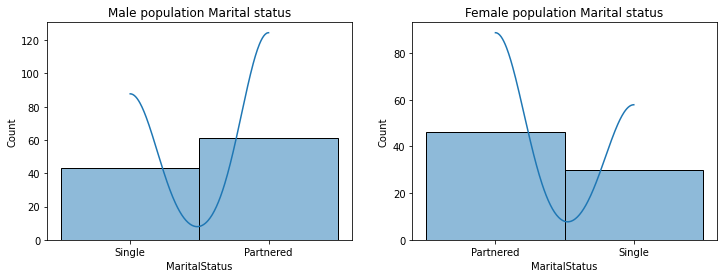

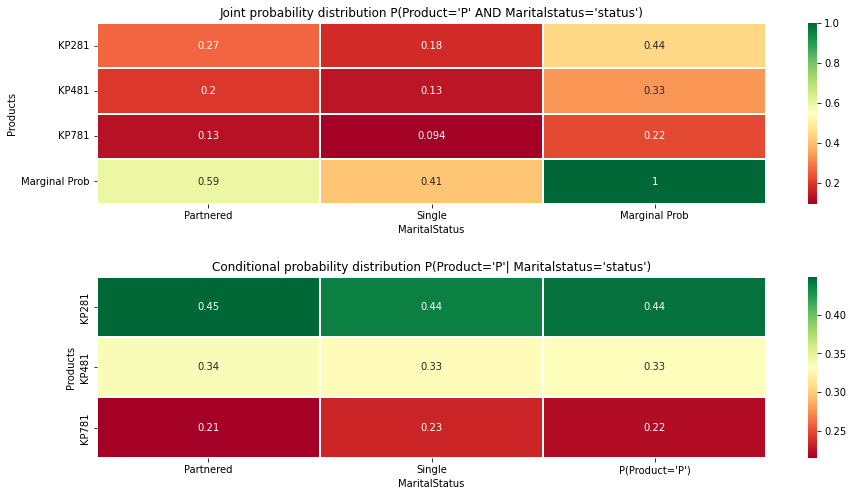

In [13]:
##### plots
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].title.set_text('Male population Marital status')
sns.histplot(x=data[data['Gender'] == 'Male']['MaritalStatus'], kde=True, ax=ax[0])

ax[1].title.set_text('Female population Marital status')
sns.histplot(x=data[data['Gender'] == 'Female']['MaritalStatus'], kde=True, ax=ax[1])

plt.show()

##### joint, conditional, and marginal probabilities

df = data
df_joint = pd.crosstab(
    df['Product'], 
    df['MaritalStatus'], 
    rownames=['Products'], 
    colnames=['MaritalStatus'], 
    margins=True,
    margins_name='Marginal Prob',
    normalize='all'
).transform(lambda x: np.round(x, 3))

df_conditional = pd.crosstab(
    df['Product'], 
    df['MaritalStatus'], 
    rownames=['Products'], 
    colnames=['MaritalStatus'], 
    margins=True,
    margins_name="P(Product='P')",
    normalize='columns'
).transform(lambda x: np.round(x, 3))

fig, ax = plt.subplots(2, 1, figsize=(15, 8))
ax[0].title.set_text("Joint probability distribution P(Product='P' AND Maritalstatus='status')")
sns.heatmap(df_joint, cmap ='RdYlGn', linewidths = 0.3, annot = True, ax=ax[0])
ax[1].title.set_text("Conditional probability distribution P(Product='P'| Maritalstatus='status')")
sns.heatmap(df_conditional, cmap ='RdYlGn', linewidths = 0.3, annot = True, ax=ax[1])

plt.subplots_adjust(hspace=0.4)
plt.show()

**Observations**
Marital status doesn't seem to impact purchase decision.

**recommendation**
None